# Keras/Tensorflow Text Classification example

Honors Research 11/7/2018

The goal of this notebook is to create a couple of text classification models using keras supported by tensorflow. For sake of processing time, the actual data used is mostly irrelevant. Yes/No of general diabetes code 250.00 was used as the single output node. The input feature vectors included notes that were in the category consult (this category was chosen since it contained the smallest amount of notes, therefore would run the fastest)

Results: multiple models were created including:

    Logisitc Regression - baseline
    
    Simple Sequential Network
    
    Using Word Embedding Layer
    
    Using Pretrained Word Embeddings
    
    Convolutional Nueral Neetwork
    
Additionally parameter optimization techniques were tested
    
    

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import json

In [2]:
NoteEvents = pd.read_csv("NOTEEVENTS.csv")

c:\users\ian\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Patient_lib contains all patients along with their icd9 diagnosis codes.

In [3]:
Patient_lib = {}
with open("patient_lib.txt") as f:
        Patient_lib = json.load(f)

The notes are then determined to either be for or not for a diabetic patient.

In [4]:
notes = []
diabetic = []
for index, row in NoteEvents.iterrows():
    if(row["CATEGORY"] == "Consult"):
        notes.append(row["TEXT"])  
        patient = str(row["SUBJECT_ID"])
        if("25000" in Patient_lib[patient]):
            diabetic.append(1)
        else:
            diabetic.append(0)
                

Below is the binary results for the notes being connected to a diabetic patient.

In [5]:
print(diabetic)

[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]


The vocabulary from each word in all the patient notes are called the corpus. By creating and assigning a value to each word, a word vector can be created(known as a feature vector). Using CountVectorizer a corpus can be created

In [6]:
vectorizer = CountVectorizer(min_df=0,lowercase=False)
vectorizer.fit(notes)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Additionally, the notes can be converted to arrays were each array gets a number for containing a word. This method is referred to as a Bag-of-Words model (BOW).

In [8]:
vectorizer.transform(notes).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 1, 0, 0],
       [3, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0]], dtype=int64)

Importing train_test_split is used to easily divide data into training and testing. 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(notes,diabetic,
                                                 test_size=0.35,
                                                random_state=1000)

In [11]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)
X_train

<63x4447 sparse matrix of type '<class 'numpy.int64'>'
	with 26641 stored elements in Compressed Sparse Row format>

In the training set there are 63 notes which means the remaining 35 are in the testing set.

CountVectorizer() seperates notes into tokens (tokenization) and gets rid of special characters and is useful to apply other preprocessing to words. Look at NLTK library with CountVectorizer to customize, for example using ngrams.

## Linear Regression model

Below a linear regression model was created in order to create a baseline model.

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
score = classifier.score(X_test,y_test)
print("Accuracy: ", score)

Accuracy:  0.8285714285714286


c:\users\ian\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Simple Sequential Network


Possible activation functions: rectified linear unit (hidden layers), sigmoid function (output in binary), or softmax (output of multi-class classification).

Backpropagation is used to determine weights. A common optimizer is Adam and a common loss function is cross entropy loss.

In [15]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1] #This is the number of features

Using TensorFlow backend.


In [16]:
model = Sequential()
model.add(layers.Dense(10,input_dim=input_dim,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                44480     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 44,491
Trainable params: 44,491
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train,y_train,epochs=30,verbose=False,
                   validation_data=(X_test,y_test),batch_size=10)

Greater batch sizes need more memory, however also speed up computations.

In [19]:
loss, accuracy = model.evaluate(X_train, y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8571


The above results show that the testing accuracy is .8286, which is slightly better then the baseline linear regression. Yet the testing accuracy is 1 which is a sign of over-fitting.

In [20]:
import matplotlib.pyplot as plt

PLot history is a function that plots training and validatino accuracy along with training and validation loss. The x-axis is epochs and the y-axis is accuracy. 100% training accuray is asign of over-fitting which generally is a time to lower the epochs. Another trigger to this is when loss of validation begins to rise.

In [21]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

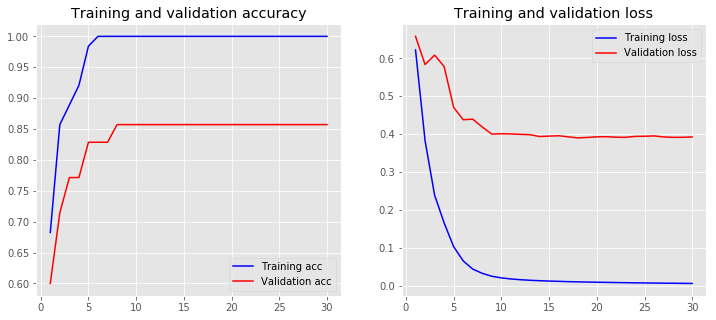

In [22]:
plot_history(history)

Another method for creating feature vectors is to use one-hot encoding

In [23]:
from keras.preprocessing.text import Tokenizer

In [24]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

In [39]:
X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1


By padding the the tokenized words all the vectors remain the same length which makes working with data cleaner

In [26]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 5000
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0,:])

[ 95 238  60 ...   0   0   0]


## Using Word Embeddings

### Flatten - Keeping All

In [27]:
from keras.models import Sequential
from keras import layers

In [28]:
embedding_dim = 50 
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5000, 50)          224400    
_________________________________________________________________
flatten_1 (Flatten)          (None, 250000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2500010   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 2,724,421
Trainable params: 2,724,421
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.7429


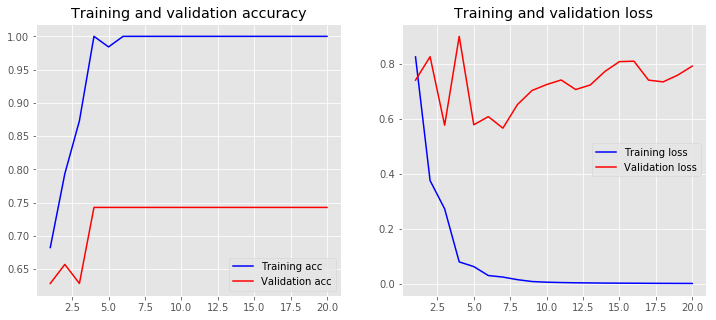

In [29]:
history = model.fit(X_train, y_train,epochs=20,verbose=False,
                    validation_data=(X_test, y_test),batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

As seen from above, the results are not very good. This is because using flatten looks at postional information oppsed to sequential information which is what this model needs.

### Pooling - reducing feature vector size

In [30]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 5000, 50)          224400    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 224,921
Trainable params: 224,921
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9143


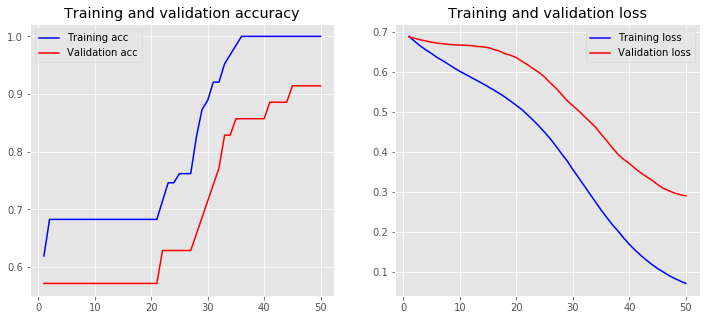

In [31]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

As seen in the above results, this drastically improved our accuracy. The next step is to consider the meaning of words by using a pretrainedword embedding

## Pretrained Word Embeddings

In [32]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
     


By using glove as the pretrained word embeddings, this may improve the results.

In [33]:
embedding_dim=50
embedding_matrix = create_embedding_matrix('glove.6B.50d.txt',
                                           tokenizer.word_index,
                                           embedding_dim)

Above the embedding_matrix was reduced. Below it is determined how many non-zero embedding vectors there are.

In [34]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix,axis=1))
print(nonzero_elements / vocab_size)

0.8540552584670231


In [35]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 5000, 50)          224400    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 224,921
Trainable params: 224,921
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8286


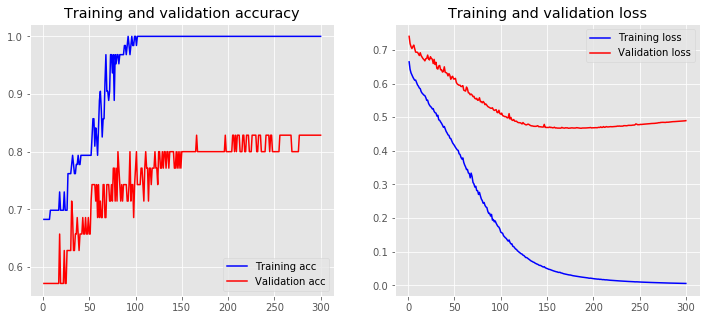

In [36]:
history = model.fit(X_train, y_train,
                    epochs=300,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

## Convolutional Neural Network (CNN)

In [37]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 5000, 100)         448800    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4996, 128)         64128     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 514,229
Trainable params: 514,229
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8571


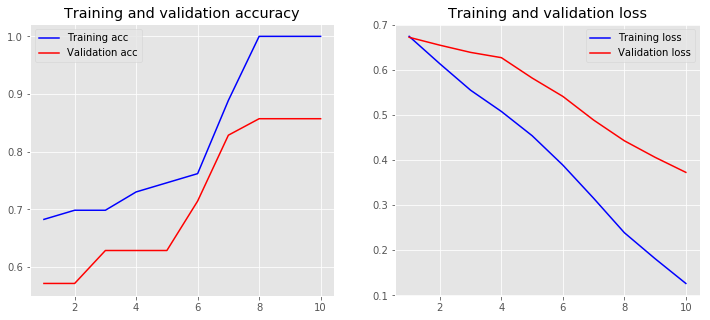

In [38]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)